In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split

animes = ['hunterX', 'dragonball', 'naruto', 'bnha']

df_animes = pd.read_csv('./Dataset/Anime2_Logit.csv')

# Transformamos Escenas de combate y emo en Tasas
df_animes[[f'Emotion.{anime}' for anime in animes]]


# # Trabsformación binaria de Quality
# for anime in animes:
#     df_animes.loc[df_animes[f'Qual.{anime}'] < 5, f'Qual.{anime}'] = 0
#     df_animes.loc[df_animes[f'Qual.{anime}'] >= 5, f'Qual.{anime}'] = 1

# # Transformación categórica de Rating
# for anime in animes:
#     df_animes.loc[df_animes[f'Rating.{anime}'] <  20, f'Rating.{anime}'] = 0
#     df_animes.loc[df_animes[f'Rating.{anime}'] >= 20, f'Rating.{anime}'] = 1
#     df_animes.loc[df_animes[f'Rating.{anime}'] >= 30, f'Rating.{anime}'] = 2

# # Transformación categórica de Duration
# for anime in animes:
#     df_animes.loc[df_animes[f'Duration.{anime}'] <  40, f'Duration.{anime}'] = 0
#     df_animes.loc[df_animes[f'Duration.{anime}'] >= 40, f'Duration.{anime}'] = 1
#     df_animes.loc[df_animes[f'Duration.{anime}'] >= 50, f'Duration.{anime}'] = 2

df_animes.head()

,Mujer,Eleccion,Combat.hunterX,Emotion.hunterX,Qual.hunterX,Combat.dragonball,Emotion.dragonball,Qual.dragonball,Combat.naruto,Emotion.naruto,Qual.naruto,Combat.bnha,Emotion.bnha,Qual.bnha
0,1,dragonball,2.195122,1.463415,4,2.222222,0.555556,7,1.000000,0.000000,2,1.132075,0.566038,8
1,1,naruto,2.033898,0.508475,7,3.750000,2.812500,6,1.363636,2.045455,3,3.428571,1.714286,4
2,1,dragonball,1.333333,0.666667,2,1.764706,1.764706,4,0.652174,1.304348,1,1.250000,0.625000,6
3,1,dragonball,2.307692,0.769231,7,2.068966,1.034483,6,2.812500,0.000000,8,1.111111,1.111111,8
4,1,dragonball,0.652174,0.652174,6,3.076923,1.538462,7,1.607143,0.000000,9,0.600000,1.200000,2


In [7]:
# Separación de la base
X = df_animes.drop('Eleccion', axis=1)
y = df_animes['Eleccion'].astype('category')

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train.head()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Normalización
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=451, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) 
print((y_pred == y_test).sum()/y_test.size)

0.3654040404040404


In [71]:
from sklearn.naive_bayes import MultinomialNB

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# NB
nb = KNeighborsClassifier()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test) 
print((y_pred == y_test).sum()/y_test.size)

0.33914141414141413


In [66]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print((y_pred == y_test).sum()/y_test.size)

0.4080808080808081


In [6]:
from sklearn.svm import SVC

# Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print((y_pred == y_test).sum()/y_test.size)

NameError: name 'X_norm' is not defined

In [40]:
df_animes.describe()

,Edad,Mujer,Combat.hunterX,Emotion.hunterX,Qual.hunterX,Duration.hunterX,Rating.hunterX,Combat.dragonball,Emotion.dragonball,Qual.dragonball,...,Combat.naruto,Emotion.naruto,Qual.naruto,Duration.naruto,Rating.naruto,Combat.bnha,Emotion.bnha,Qual.bnha,Duration.bnha,Rating.bnha
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0000
mean,36.477000,0.490000,3.000000,1.416667,5.250000,46.666667,23.166667,2.416667,1.583333,5.666667,...,2.083333,1.333333,5.500000,42.166667,26.166667,1.583333,1.500000,5.833333,44.250000,19.5000
std,7.580782,0.499921,1.000042,0.759234,2.553699,8.055700,7.872572,1.441028,0.862043,1.972109,...,1.187367,1.312389,2.363006,9.290465,9.191260,1.187367,1.040876,2.544162,9.619176,10.4766
min,24.000000,0.000000,1.000000,0.000000,1.000000,31.000000,11.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,30.000000,12.000000,0.000000,0.000000,1.000000,31.000000,5.0000
25%,30.000000,0.000000,2.000000,1.000000,3.500000,40.500000,15.250000,1.750000,1.000000,4.000000,...,1.000000,0.000000,3.750000,33.500000,20.000000,0.750000,0.750000,4.000000,34.750000,11.0000
50%,36.000000,0.000000,3.000000,1.000000,6.000000,46.000000,24.500000,2.500000,1.500000,6.000000,...,2.500000,1.000000,6.000000,44.000000,23.500000,2.000000,2.000000,6.500000,46.500000,19.0000
75%,43.000000,1.000000,4.000000,2.000000,7.000000,52.000000,29.250000,4.000000,2.000000,7.250000,...,3.000000,3.000000,7.000000,48.500000,35.000000,2.000000,2.000000,8.000000,53.250000,26.5000
max,49.000000,1.000000,4.000000,3.000000,9.000000,59.000000,35.000000,4.000000,3.000000,8.000000,...,4.000000,3.000000,9.000000,56.000000,39.000000,4.000000,3.000000,9.000000,59.000000,37.0000


C:\Users\niace\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


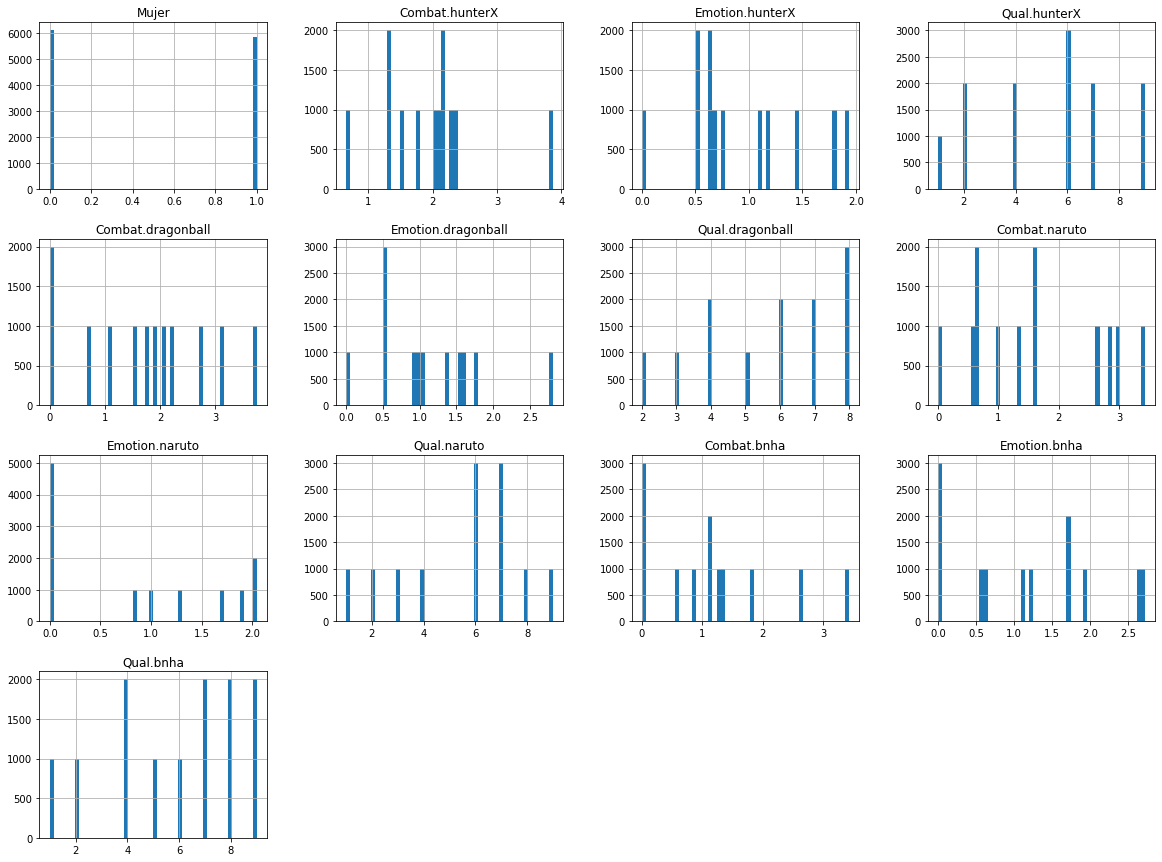

In [3]:
import matplotlib.pyplot as plt 
df_animes.hist(figsize=(20,15), bins=50)
plt.show()

CV y métricas a considerar

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Separación de la base
X = df_animes.drop('Eleccion', axis=1)
y = df_animes['Eleccion'].astype('category')

# Normalización
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)


models = [RandomForestClassifier(), KNeighborsClassifier(), MultinomialNB(), SVC()]
for model in models:

    # model = KNeighborsClassifier()#SVC()
    cv_results = cross_validate(
        model, X_train, y_train, 
        cv=3,
        #scoring=('roc_auc', 'f1_score', 'f1_weighted', 'accuracy', 'neg_log_loss') # Scorings a considerar para el CV
        scoring='f1_weighted'
        )
    str_model = f'{model}'[:-2]
    print(f'{str_model}:\t',cv_results['test_score'])

# sorted(cv_results.keys())

RandomForestClassifier:	 [0.35911721 0.34842348 0.35218407]
KNeighborsClassifier:	 [0.33427582 0.33841531 0.30990761]
MultinomialNB:	 [0.32140473 0.31717477 0.3061131 ]
SVC:	 [0.35911721 0.34842348 0.35218407]


# Probamos con la original

In [2]:
import pandas as pd
df = pd.read_csv('./Dataset/Anime2.csv', index_col=0)
df.head()

,Expertos,Capitulos,Animes,Edad,Mujer,CantCaps,Scoremyanimelist,NEscenasCombate,NescenasEmocionantes,CalidadAnimacion,DuracionCapituloMin,RatingTV,Eleccion
1.1.1,1,1,1,42,1,575,8.0,3,2,4,41,13,0
1.1.2,1,1,2,42,1,720,6.5,4,1,7,54,27,1
1.1.3,1,1,3,42,1,148,10.0,1,0,2,30,20,0
1.1.4,1,1,4,42,1,113,4.0,2,1,8,53,15,0
1.2.1,1,2,1,42,1,575,8.0,4,1,7,59,25,0


In [3]:
categoricas = ['Expertos', 'Capitulos', 'Animes', 'Mujer', 'Eleccion']

# Pasamos a categoricas
for feature in df.columns:
    if feature in categoricas:
        df[feature] = df[feature].astype('category')

df.dtypes

Expertos                category
Capitulos               category
Animes                  category
Edad                       int64
Mujer                   category
CantCaps                   int64
Scoremyanimelist         float64
NEscenasCombate            int64
NescenasEmocionantes       int64
CalidadAnimacion           int64
DuracionCapituloMin        int64
RatingTV                   int64
Eleccion                category
dtype: object

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Separación de la base
X = df.drop('Eleccion', axis=1)
y = df['Eleccion']

# # Normalización
# scaler = MinMaxScaler()
# X_norm = scaler.fit_transform(X)
# X_norm = pd.DataFrame(X_norm, columns=X.columns)

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)


models = [KNeighborsClassifier(), MultinomialNB(),RandomForestClassifier(), SVC()]
for model in models:

    # model = KNeighborsClassifier()#SVC()
    cv_results = cross_validate(
        model, X, y, 
        cv=3,
        #scoring=('roc_auc', 'f1_score', 'f1_weighted', 'accuracy', 'neg_log_loss') # Scorings a considerar para el CV
        scoring='f1_weighted'
        )
    str_model = f'{model}'[:-2]
    print(f'{str_model}:\t',cv_results['test_score'])

# sorted(cv_results.keys())

KeyboardInterrupt: 